In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency


In [12]:
df = pd.read_csv('sleep editted file.csv')
df

,Person ID,Gender,Age,Age group,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Systolic BP,Systolic BP Range,Diastolic,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,27-29,Software Engineer,6.1,6,42,6,Overweight,126/83,126,normal,83,77,4200,NaN
1,2,Male,28,27-29,Doctor,6.2,6,60,8,Normal,125/80,125,normal,80,75,10000,NaN
2,3,Male,28,27-29,Doctor,6.2,6,60,8,Normal,125/80,125,normal,80,75,10000,NaN
3,4,Male,28,27-29,Sales Representative,5.9,4,30,8,Obese,140/90,140,hypertension 2,90,85,3000,Sleep Apnea
4,5,Male,28,27-29,Sales Representative,5.9,4,30,8,Obese,140/90,140,hypertension 2,90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,50-59,Nurse,8.1,9,75,3,Overweight,140/95,140,hypertension 2,95,68,7000,Sleep Apnea
370,371,Female,59,50-59,Nurse,8.0,9,75,3,Overweight,140/95,140,hypertension 2,95,68,7000,Sleep Apnea
371,372,Female,59,50-59,Nurse,8.1,9,75,3,Overweight,140/95,140,hypertension 2,95,68,7000,Sleep Apnea
372,373,Female,59,50-59,Nurse,8.1,9,75,3,Overweight,140/95,140,hypertension 2,95,68,7000,Sleep Apnea


In [13]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic BP,Diastolic,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,128.553476,84.649733,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,7.748118,6.161611,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,115.000000,75.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,125.000000,80.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,130.000000,85.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,135.000000,90.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,142.000000,95.000000,86.000000,10000.000000


In [14]:
df = df.rename(columns={'Systolic BP Range': 'Hypertension Type'})
df['BMI Category'] = df['BMI Category'].replace("Normal weight", "Underweight")

In [15]:
df.corr(numeric_only=True)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic BP,Diastolic,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,0.611551,0.590670,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,0.605878,0.593839,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.180406,-0.166570,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.121632,-0.110151,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.265416,0.382651,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.102818,0.091811,0.670026,0.186829
Systolic BP,0.611551,0.605878,-0.180406,-0.121632,0.265416,0.102818,1.000000,0.972885,0.294143,0.103342
Diastolic,0.590670,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.972885,1.000000,0.271092,0.241986
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,0.294143,0.271092,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,0.103342,0.241986,-0.030309,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Age group                374 non-null    object 
 4   Occupation               374 non-null    object 
 5   Sleep Duration           374 non-null    float64
 6   Quality of Sleep         374 non-null    int64  
 7   Physical Activity Level  374 non-null    int64  
 8   Stress Level             374 non-null    int64  
 9   BMI Category             374 non-null    object 
 10  Blood Pressure           374 non-null    object 
 11  Systolic BP              374 non-null    int64  
 12  Hypertension Type        374 non-null    object 
 13  Diastolic                374 non-null    int64  
 14  Heart Rate               3

In [17]:
df['Age group'].unique()

array(['27-29', '30-39', '40-49', '50-59'], dtype=object)

In [18]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

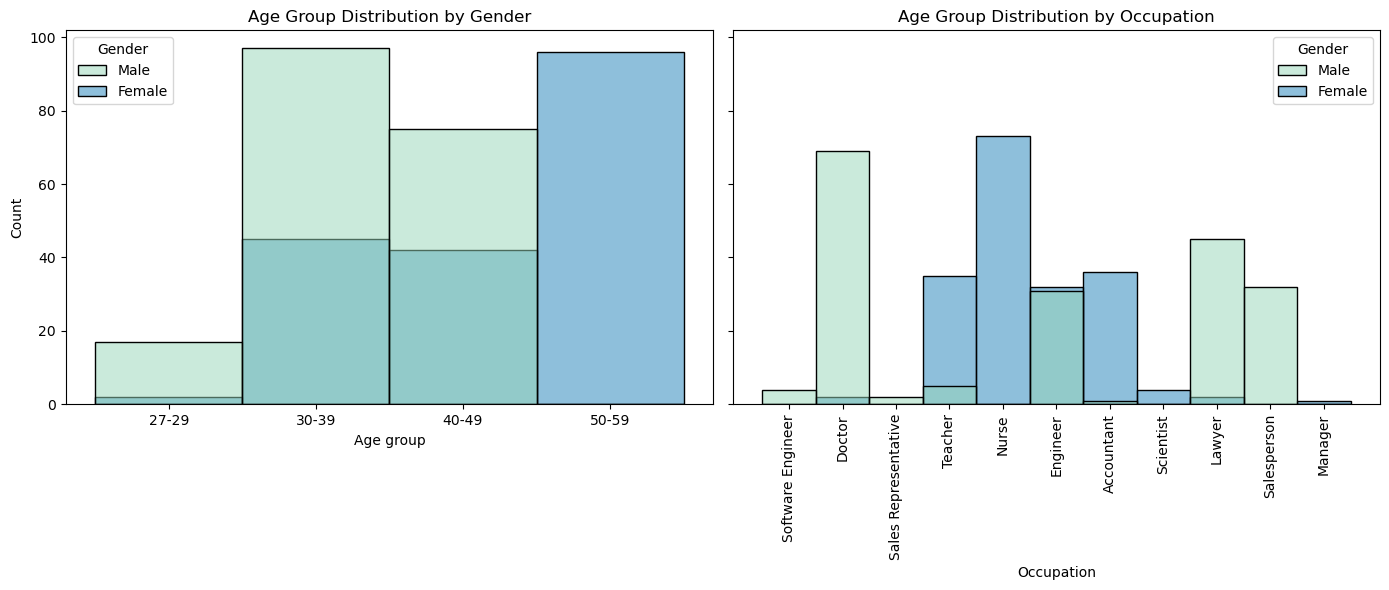

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram of Age group by Gender
palette = sns.color_palette("YlGnBu", 2)
sns.histplot(x='Age group', hue='Gender', data=df, ax=axes[0],palette=palette)
axes[0].set_title('Age Group Distribution by Gender')
plt.xticks(rotation=90)

# Histogram of Age group by Occupation
sns.histplot(x='Occupation', hue='Gender', data=df, ax=axes[1],palette=palette)
axes[1].set_title('Age Group Distribution by Occupation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


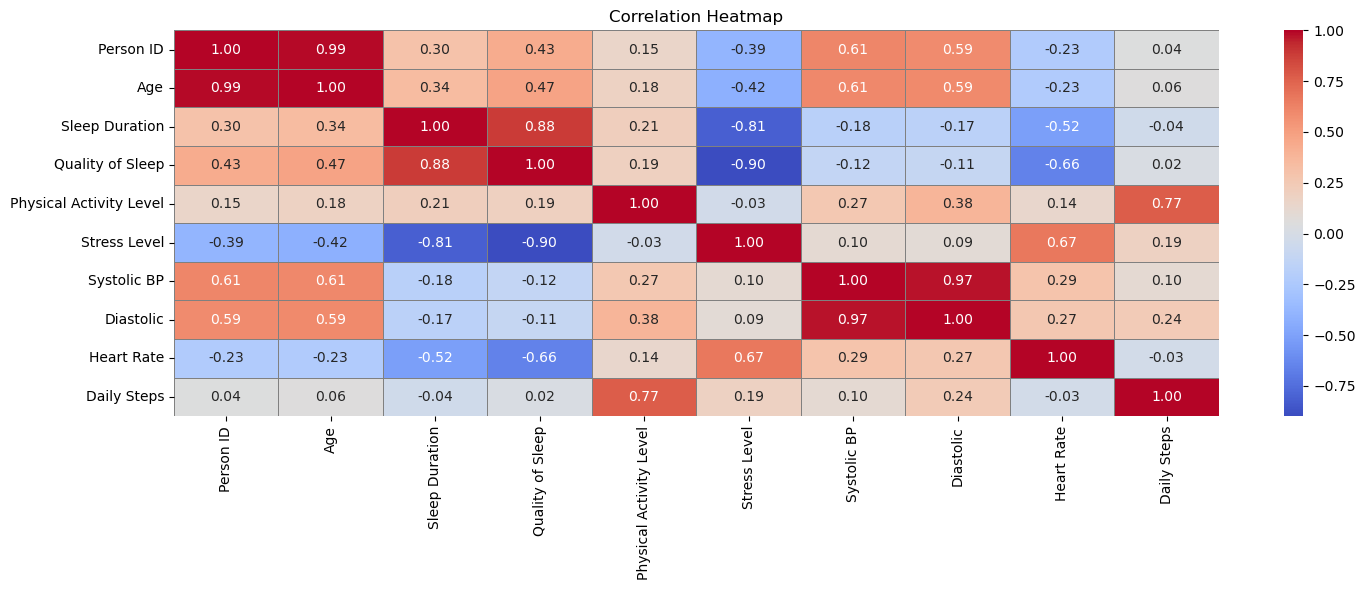

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))  # Set figure size
sns.heatmap(
    df.corr(numeric_only=True),   # Correlation of numeric columns
    annot=True,                   # Show values in the cells
    fmt=".2f",                    # Format to 2 decimal places
    cmap="coolwarm",              # Color map
    linewidths=0.5,               # Add space between cells
    linecolor='gray',            # Gridline color
    cbar=True                     # Show color bar
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


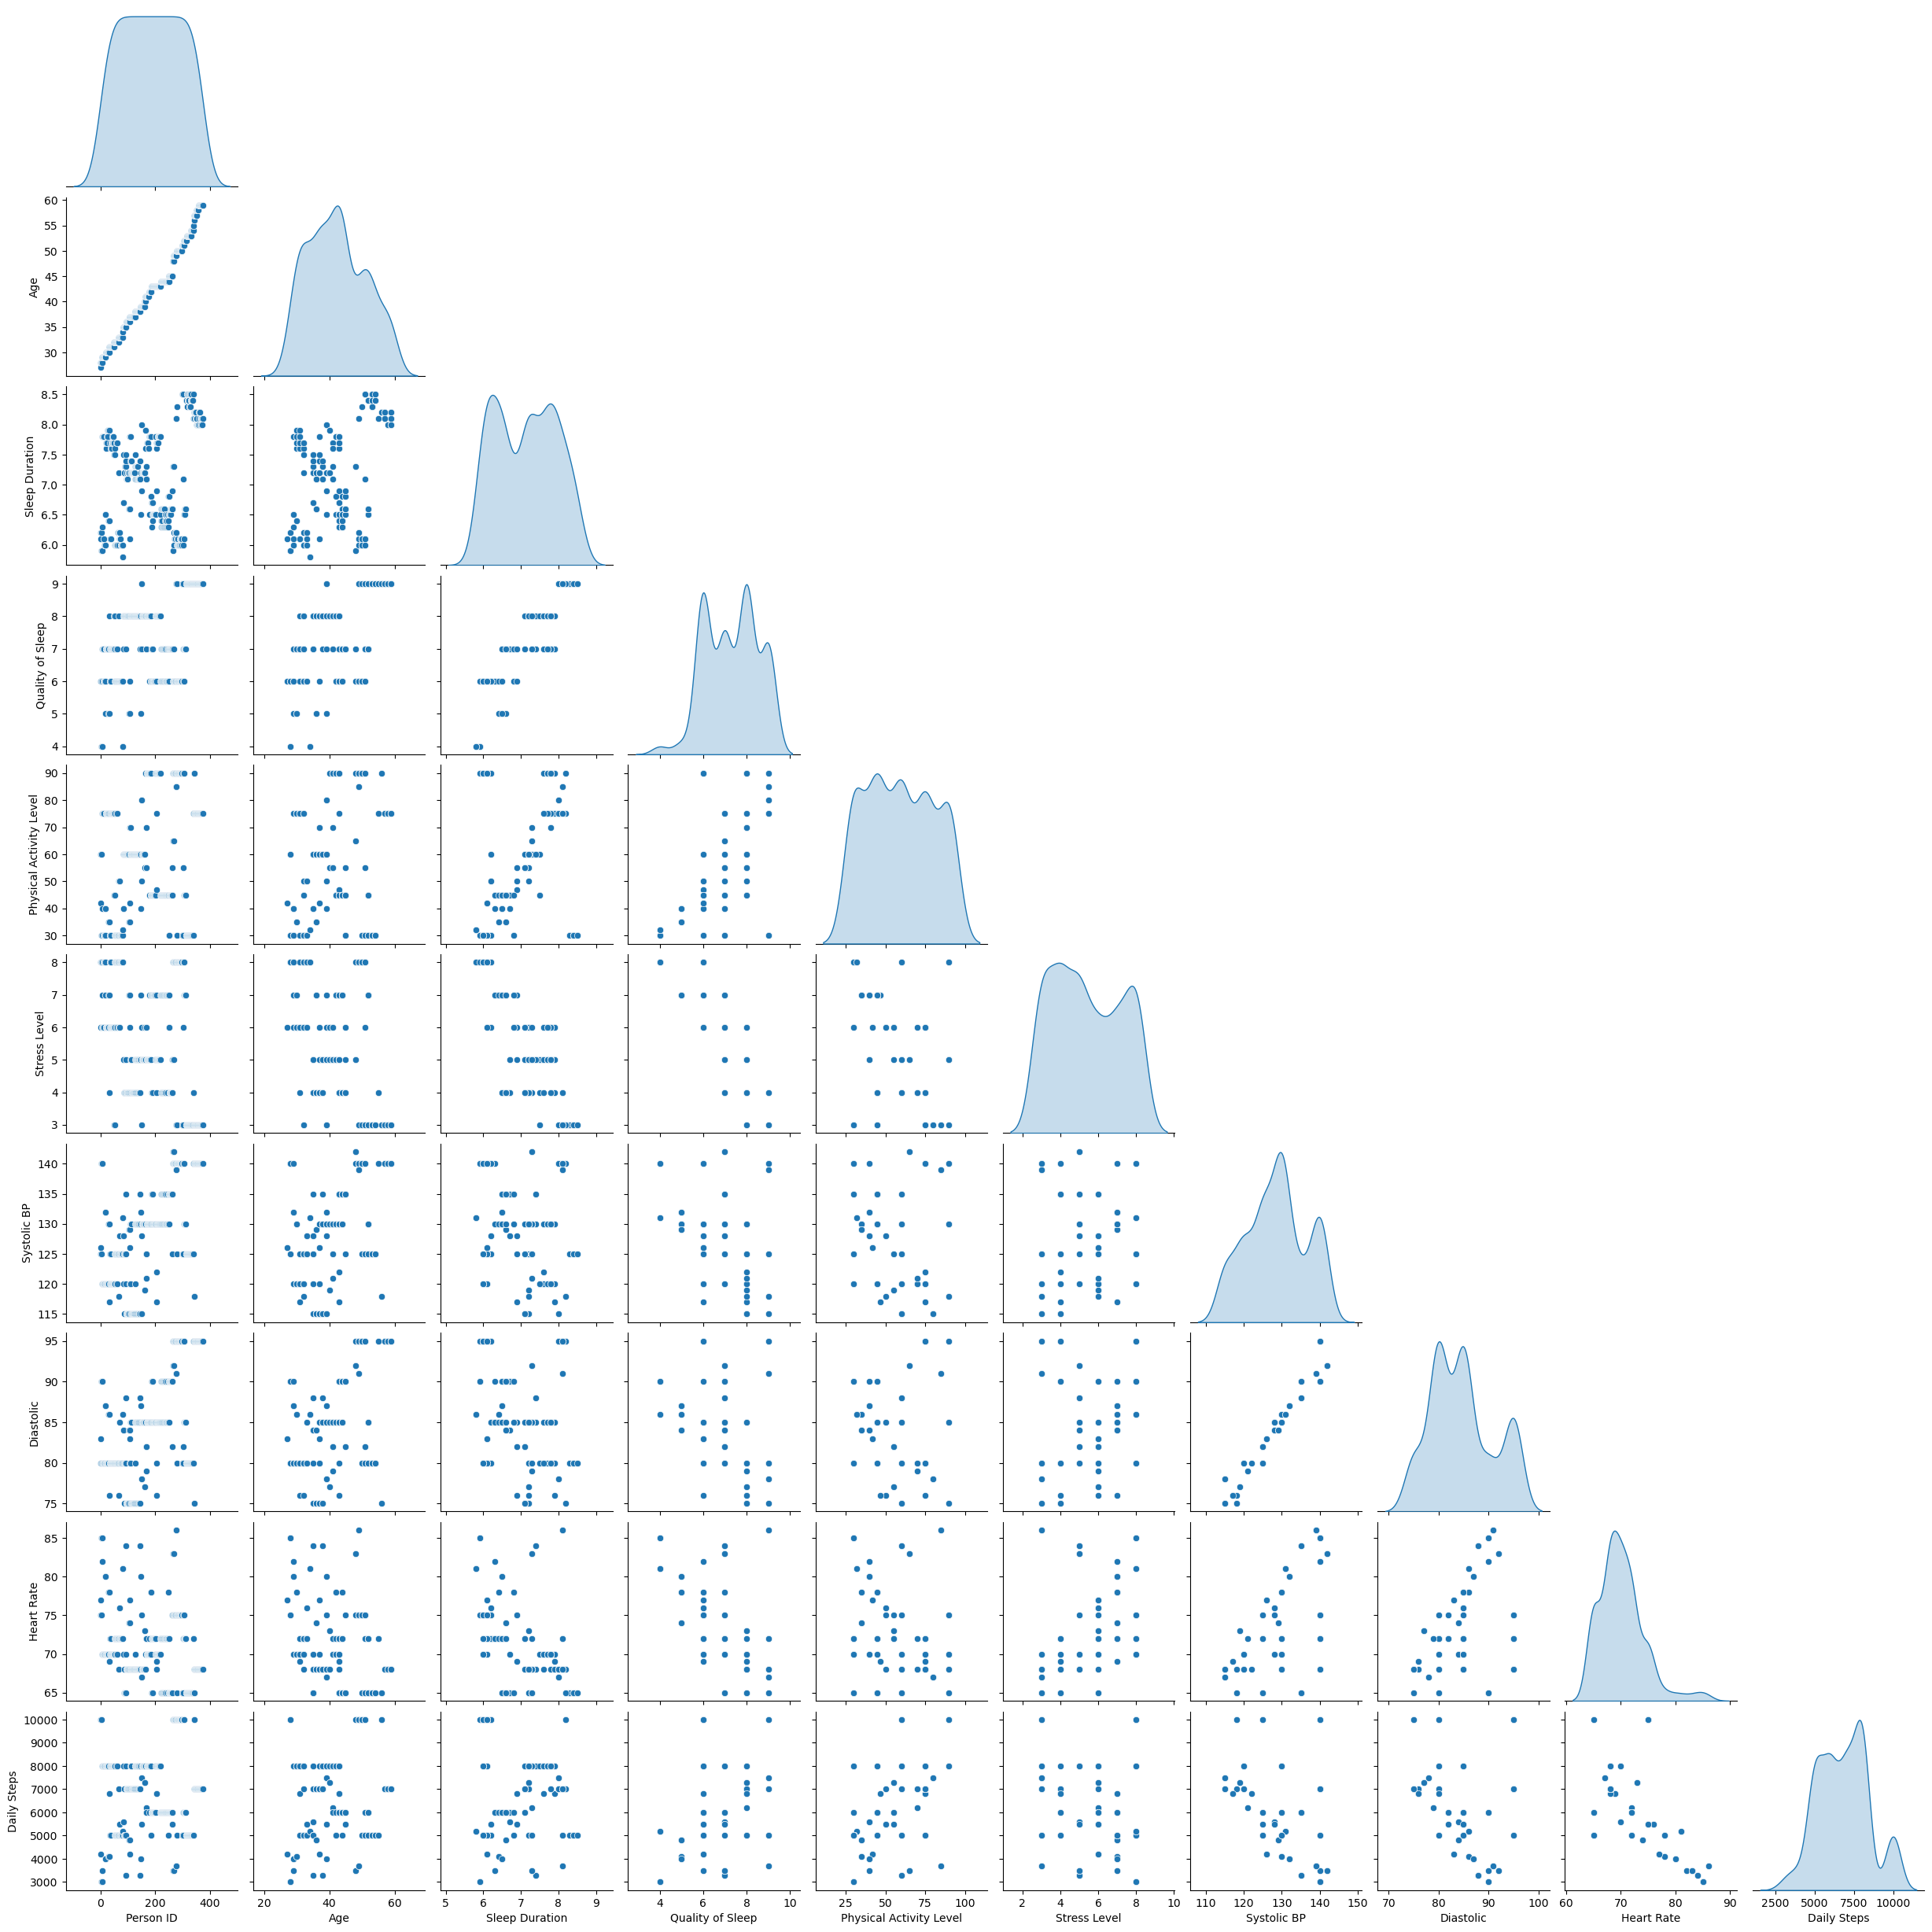

In [21]:
sns.pairplot(
    df,   # Color by category (optional)
    diag_kind="kde",         # Use KDE on the diagonal (or 'hist')
    corner=True              # Plot only the lower triangle
)
plt.show()

In [22]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Age group', 'Occupation',
       'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Blood Pressure', 'Systolic BP',
       'Hypertension Type', 'Diastolic', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

<Axes: xlabel='Age group', ylabel='Systolic BP'>

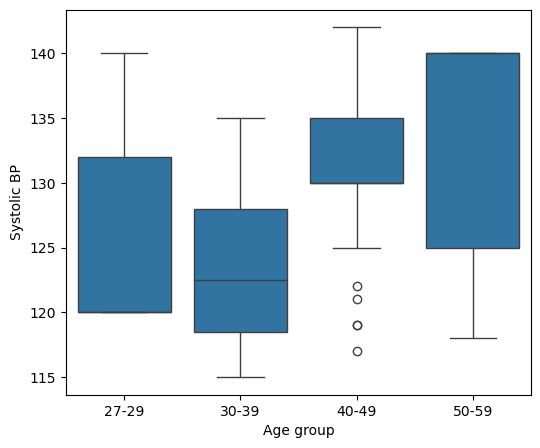

In [23]:
plt.figure(figsize=(6, 5))

sns.boxplot(
    x='Age group',
    y='Systolic BP',
    data=df)

<Axes: xlabel='BMI Category', ylabel='Systolic BP'>

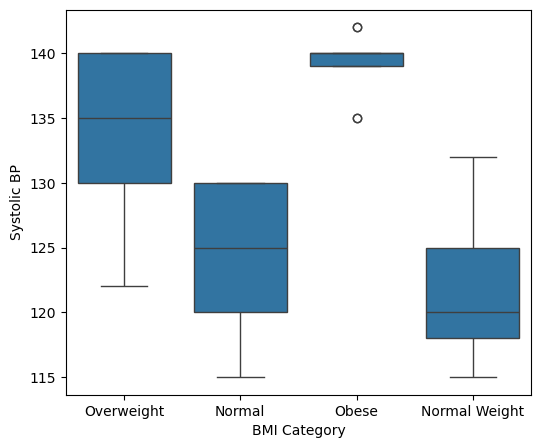

In [24]:
plt.figure(figsize=(6, 5))

sns.boxplot(
    x='BMI Category',
    y='Systolic BP',
    data=df)

<Axes: xlabel='Gender', ylabel='Systolic BP'>

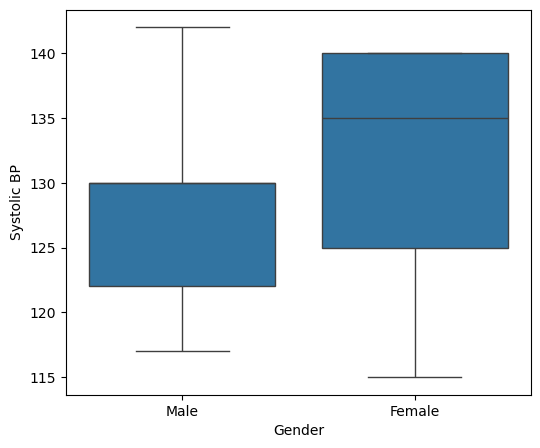

In [25]:
plt.figure(figsize=(6, 5))

sns.boxplot(
    x='Gender',
    y='Systolic BP',
    data=df)

<Axes: xlabel='Heart Rate', ylabel='Daily Steps'>

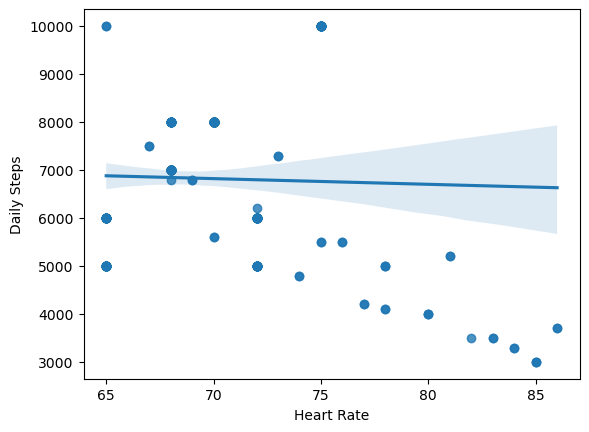

In [26]:
sns.regplot(x='Heart Rate',y='Daily Steps',data=df)

#  BMI vs Hypertension type

## Hypothesis Question:
"Is there a significant relationship between gender and sleep disorder occurrence?

## Null and Alternative Hypotheses
- Null Hypothesis (H₀):
There is no association between Bmi and Hypertension type.
(They are independent.)

- Alternative Hypothesis (H₁):
There is an association between Bmi and Hypertension type.
(They are dependent.)

### Hypothesis type is chi2_contingency, comparing two different categorical variables Bmi and Hypertension type


In [27]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Age group', 'Occupation',
       'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Blood Pressure', 'Systolic BP',
       'Hypertension Type', 'Diastolic', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [28]:
contigency= pd.crosstab(df['BMI Category'], df['Hypertension Type'])
contigency

Hypertension Type,hypertension 1,hypertension 2,normal
BMI Category,,,
Normal,58,0,137
Normal Weight,4,0,17
Obese,4,6,0
Overweight,71,65,12


<Axes: title={'center': 'Contingency Table Bar Plot'}, xlabel='Categories', ylabel='Count'>

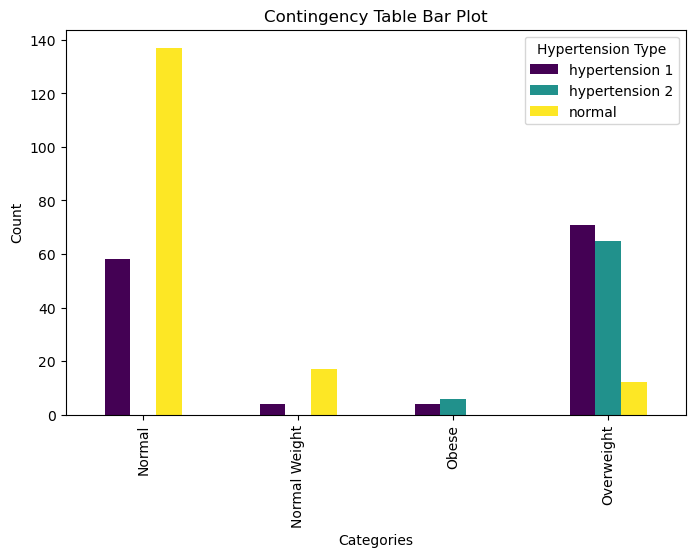

In [29]:
contigency.plot(kind='bar', 
                 figsize=(8,5), 
                 stacked=False,  
                 colormap='viridis', 
                 title='Contingency Table Bar Plot',
                 xlabel='Categories',
                 ylabel='Count')


In [30]:
# Using the chi2_contingency test 
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 191.91853523911132 , Pvalue: 9.94522095004991e-39 , Degree of freedom: 6 ,expected frequencies: [[71.43048128 37.01871658 86.55080214]
 [ 7.69251337  3.98663102  9.32085561]
 [ 3.6631016   1.89839572  4.43850267]
 [54.21390374 28.09625668 65.68983957]] 


In [31]:
if (pval < 0.05):
    print('Reject Null Hypothesis that there is no association between Bmi and Hypertension type.')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis that there is no association between Bmi and Hypertension type.


## Statistical Conclusion
A chi-square test of independence was performed to evaluate the association between BMI categories and Hypertension type. The test results indicated a significant relationship between these two variables (χ² = [chi-square statistic], p-value = [p-value]).

Since the p-value is less than the typical significance level of 0.05, we reject the null hypothesis that there is no association between BMI and Hypertension type.

This suggests that BMI category is significantly related to Hypertension status. In other words, variations in BMI categories correspond to differences in the distribution of hypertension types.

These findings imply that BMI may play an important role in influencing or predicting hypertension



In [32]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Age group', 'Occupation',
       'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Blood Pressure', 'Systolic BP',
       'Hypertension Type', 'Diastolic', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')